# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Parveen Uzma Habidin
- **Email:** parveen.535220226@stu.untar.ac.id
- **ID Dicoding:** MC325D5X1356

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari libur terhadap jumlah peminjaman sepeda?
- Bagaimana perubahan musim memengaruhi tingkat peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [2]:
# Membaca data 'day' dan memperlihatkan data 'day'
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca data dan memperlihatkan data
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
# Memeriksa tipe data dari setiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Memeriksa tipe data dari setiap kolom
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#memeriksa missing value
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
#memeriksa missing value
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
# memeriksa duplikat
day_df.duplicated().sum()

0

In [9]:
# memeriksa duplikat
hour_df.duplicated().sum()


0

**Insight:**
- terdapat kesalahan tipe data pada 'dteday' yang tertulis sebagai object yang seharusnya adalah datetime.

- kedua data memiliki jumlah yang sama, artinya jumlah data lengkap. tidak ada missing value dan duplicate.




### Cleaning Data

In [10]:
# Mengubah tipe data 'dteday' pada 'day_df' dan 'hour_df'.
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(day_df[column])


In [11]:
# memeriksa apakah tipe data sudah terganti
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
# memeriksa apakah tipe data sudah terganti
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- melihat hasil diatas, tipe data 'dteday' sudah benar.

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
allData_df = pd.merge(
    left=day_df,
    right=hour_df,
    left_on=["holiday"],
    right_on=["workingday"],
    how="inner"
)
allData_df.head()

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
#mengganti inisialisasi
day_df.holiday.replace((0,1),("Libur","Bukan"),inplace=True)
day_df.workingday.replace((0,1),("Bukan","Hari Kerja"),inplace=True)
day_df.weathersit.replace((1,2,3,4), ("cerah","berkabut",
                                       "hujan ringan","hujan lebat"),inplace=True)

day_df.head()

<ipython-input-15-d56696c05997>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.holiday.replace((0,1),("Libur","Bukan"),inplace=True)
<ipython-input-15-d56696c05997>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,Libur,6,Bukan,berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,Libur,0,Bukan,berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,Libur,1,Hari Kerja,cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,Libur,2,Hari Kerja,cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,Libur,3,Hari Kerja,cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
day_df.groupby(by = "season").nunique().sort_values(by=['instant'],ascending=False)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
3,188,188,2,4,2,7,2,3,137,177,176,181,178,181,188
2,184,184,2,4,2,7,2,3,152,180,177,176,173,180,182
1,181,181,2,4,2,7,2,3,160,178,176,178,155,177,179
4,178,178,2,4,2,7,2,3,148,177,173,170,167,177,176


In [17]:
day_df.groupby(by = "holiday").agg({
    "cnt" : "sum",
})

,cnt
holiday,
Bukan,78435
Libur,3214244


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-29-8f44a8158a3c>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  info_text = f"Total Hari:\nHari Kerja: {Thari[0]}\nHari Libur: {Thari[1]}"


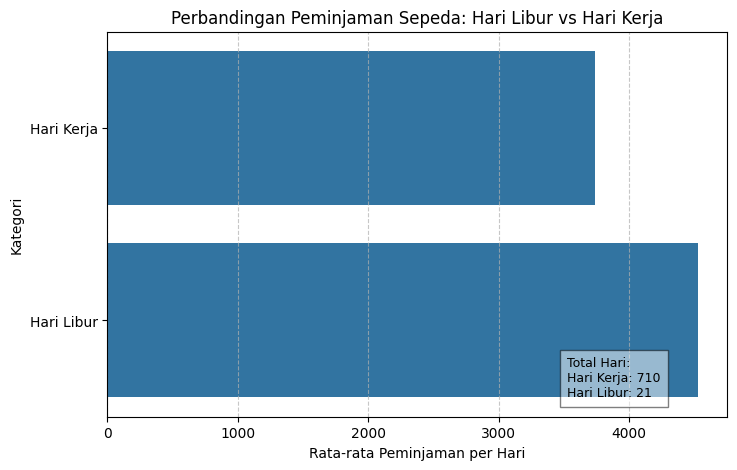

In [29]:
# Hitung total peminjaman dan jumlah hari berdasarkan kategori libur
Totpmjmn = day_df.groupby('holiday')["cnt"].sum()
Thari = day_df["holiday"].value_counts()
Mean= Totpmjmn / Thari

# Buat DataFrame untuk visualisasi
data = pd.DataFrame({
    "Kategori": ["Hari Kerja", "Hari Libur"],
    "Total Peminjaman": Totpmjmn.values,
    "Total Hari": Thari.values,
    "Rata-rata Peminjaman per Hari": Mean.values
})

# Membuat Plot diagram
plt.figure(figsize=(8, 5))
sns.barplot(y=data["Kategori"], x=data["Rata-rata Peminjaman per Hari"])

# Styling
plt.xlabel("Rata-rata Peminjaman per Hari")
plt.ylabel("Kategori")
plt.title("Perbandingan Peminjaman Sepeda: Hari Libur vs Hari Kerja", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Menambahkan Teks
info_text = f"Total Hari:\nHari Kerja: {Thari[0]}\nHari Libur: {Thari[1]}"
plt.figtext(0.7, 0.15, info_text, fontsize=9, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})

plt.show()


### Pertanyaan 2:

In [19]:
day_df.groupby(by = "season").agg({
    "cnt" : "sum",
})

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


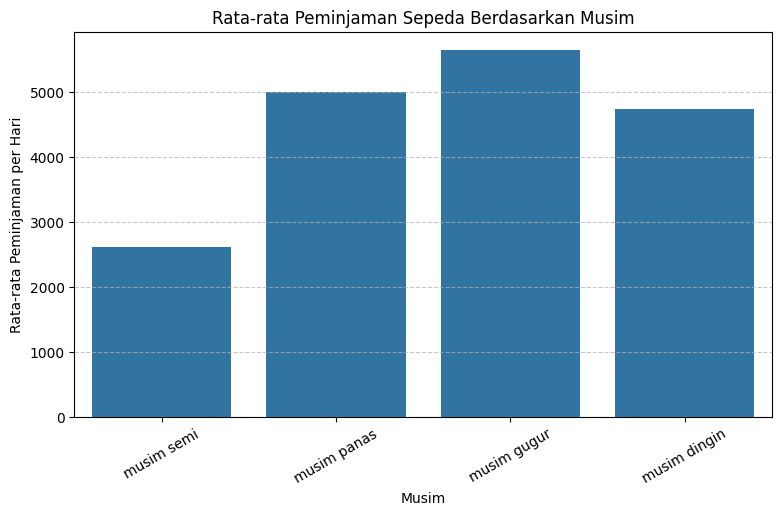

In [30]:
# Mapping angka musim ke label
season_labels = ["musim semi", "musim panas", "musim gugur", "musim dingin"]

# Menghitung statistik peminjaman berdasarkan musim
stats = day_df.groupby("season")["cnt"].agg(total="sum", jmlhari="count", mean="mean").round(2)

# Membuat plot diagram
plt.figure(figsize=(9, 5))
sns.barplot(x=stats.index.astype(str), y=stats["mean"])

# Styling
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman per Hari")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim", fontsize=12)
plt.xticks(ticks=stats.index.astype(int) - 1, labels=season_labels, rotation=30)  # Mengganti angka dengan label musim
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()


**Insight:**
- Rata-Rata peminjaman sepeda terbanyak pada hari libur
- Peminjaman sepeda cenderung lebih tinggi pada musim: musim gugur

## Analisis Lanjutan (Opsional)

- Pertanyaan 1 : mengclustering peminjaman berdasarkan jam di hari libur

In [21]:
# Pastikan kolom yang dibutuhkan tersedia
columns_needed = ['hr', 'cnt', 'holiday', 'temp', 'hum', 'windspeed']
hour_df = hour_df[columns_needed]

# Normalisasi data agar clustering lebih efektif
scaler = StandardScaler()
hour_df_scaled = scaler.fit_transform(hour_df)

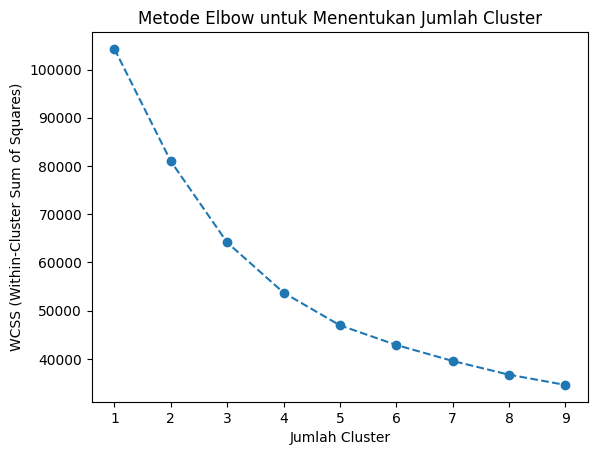

In [22]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(hour_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.show()

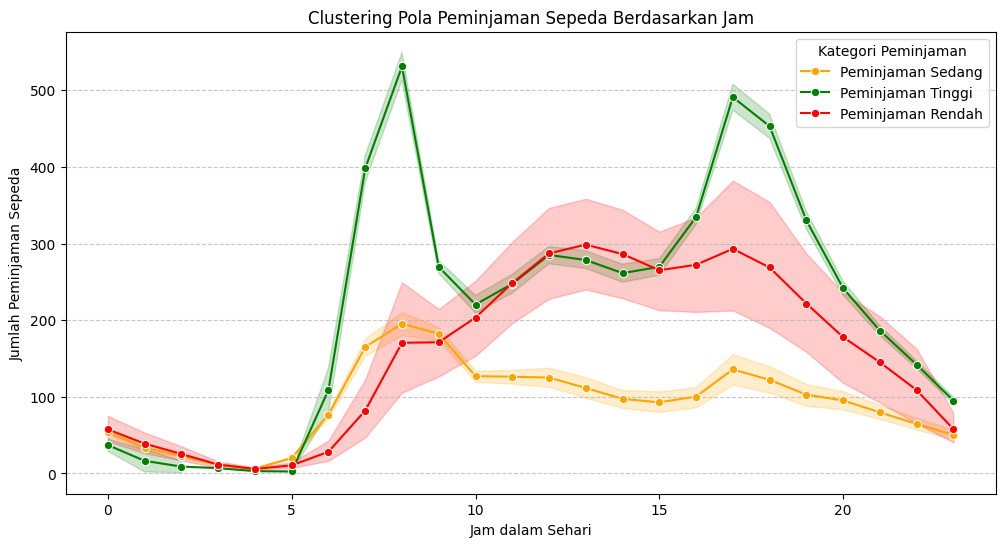

In [23]:
# Tentukan jumlah cluster optimal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hour_df['Cluster'] = kmeans.fit_predict(hour_df_scaled)

# Mapping label cluster ke kategori peminjaman
cluster_labels = {0: "Peminjaman Rendah", 1: "Peminjaman Sedang", 2: "Peminjaman Tinggi"}
hour_df['Cluster Label'] = hour_df['Cluster'].map(cluster_labels)

# Visualisasi cluster berdasarkan jam dan jumlah peminjaman
plt.figure(figsize=(12,6))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], hue=hour_df['Cluster Label'],
             palette=['orange', 'green', 'red'], marker='o')

plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Clustering Pola Peminjaman Sepeda Berdasarkan Jam')
plt.legend(title="Kategori Peminjaman")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


penjelasan:
- Peminjaman Rendah (merah) terjadi pada dini hari (00:00 - 05:00) dan larut malam setelah pukul 20:00, menunjukkan aktivitas peminjaman yang sangat sedikit.
- Peminjaman Tinggi (hijau) terjadi di dua puncak utama:
Pukul 07:00 - 09:00: Kemungkinan karena jam berangkat kerja atau sekolah.
Pukul 17:00 - 19:00: Berkaitan dengan jam pulang kerja/sekolah.
- Peminjaman Sedang (kuning) terjadi sepanjang siang hingga sore, dengan tren yang stabil namun lebih rendah dibandingkan kategori tinggi.

Bayangan di sekitar garis menunjukkan rentang variabilitas atau tingkat kepercayaan data. Semakin lebar bayangan, semakin bervariasi jumlah peminjaman pada jam tersebut.

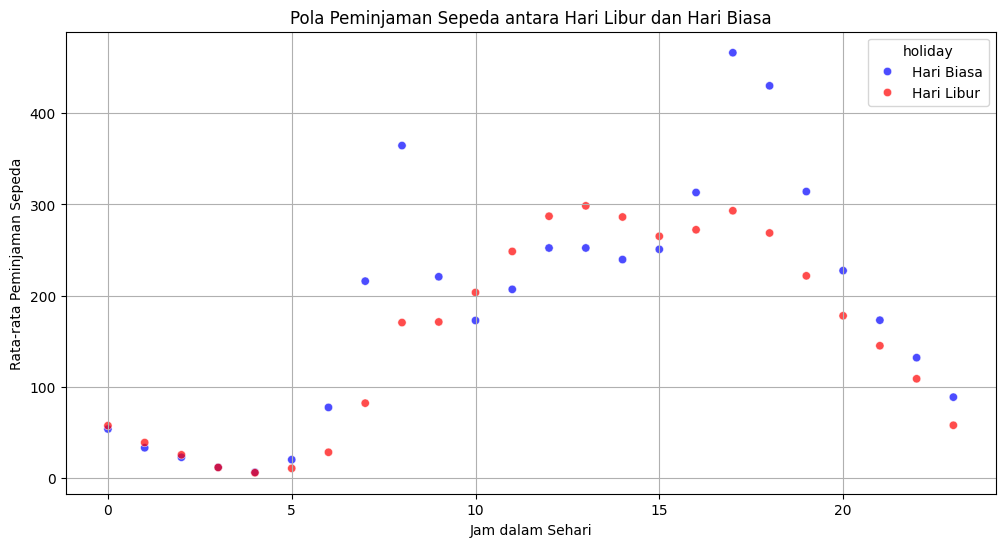

In [24]:
# Grouping berdasarkan hari libur atau tidak
holiday_group = hour_df.groupby(['holiday',
                                 'hr'])['cnt'].mean().reset_index()

# Visualisasi hasil menggunakan scatter plot dengan seaborn untuk melihat pola
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot( x='hr', y='cnt', hue='holiday', data=holiday_group, palette={0: 'blue', 1: 'red'}, alpha=0.7 )

legend_labels = ['Hari Biasa', 'Hari Libur']
for t, l in zip(scatter.legend_.texts, legend_labels):
    t.set_text(l)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Pola Peminjaman Sepeda antara Hari Libur dan Hari Biasa')
plt.grid()
plt.show()

**Insight:**
- Pada pagi hari (jam 6 - 9), peminjaman lebih tinggi pada hari biasa dibandingkan hari libur. Ini bisa dikaitkan dengan aktivitas berangkat kerja atau sekolah.
- Pada siang hingga sore hari (jam 10 - 17), peminjaman pada hari libur cenderung lebih tinggi atau mendekati hari biasa, yang kemungkinan karena aktivitas rekreasi.
- Pada malam hari (jam 18 - 21), peminjaman sepeda pada hari biasa tetap tinggi, mungkin karena perjalanan pulang kerja.

Pertanyaan 2:

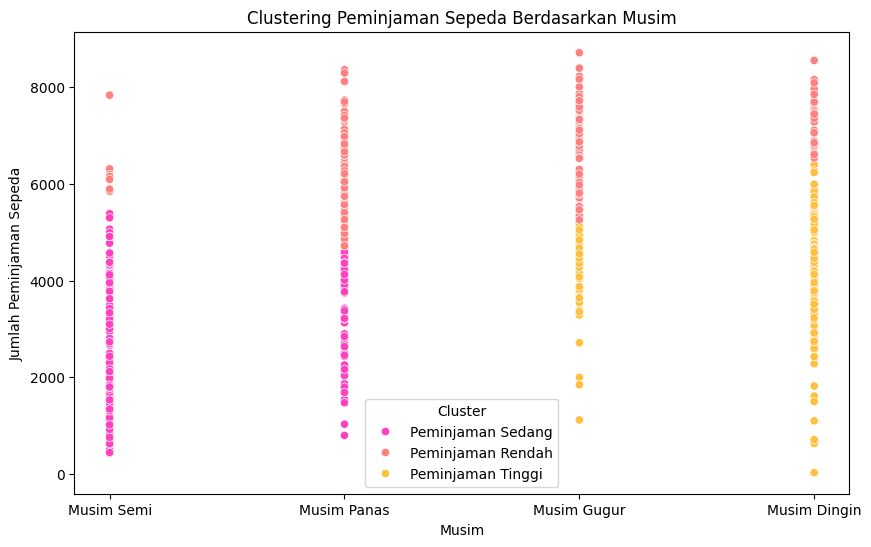

In [33]:
# Pilih fitur yang relevan (musim & jumlah peminjaman)
data = day_df[['season', 'cnt']]

# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Tentukan jumlah cluster optimal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
day_df['Cluster'] = kmeans.fit_predict(data_scaled)

# Mapping label cluster ke kategori peminjaman
cluster_labels = {0: "Peminjaman Rendah", 1: "Peminjaman Sedang", 2: "Peminjaman Tinggi"}
day_df['Cluster Label'] = day_df['Cluster'].map(cluster_labels)

# Visualisasi hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=day_df['season'], y=day_df['cnt'], hue=day_df['Cluster Label'],
                palette='spring')
plt.xticks([1,2,3,4], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Clustering Peminjaman Sepeda Berdasarkan Musim')
plt.legend(title="Cluster")
plt.show()


penjelasan:
- Musim Panas dan Musim Gugur tampaknya memiliki lebih banyak hari dengan peminjaman tinggi, yang berarti lebih banyak orang menggunakan sepeda saat cuaca lebih hangat.
-Musim Semi dan Musim Dingin cenderung memiliki lebih banyak hari dengan peminjaman sedang atau rendah, mungkin karena kondisi cuaca yang kurang ideal.

## Conclusion

- Pertanyaan 1: Peminjaman sepeda cenderung lebih tinggi pada hari libur dibandingkan dengan hari kerja, yang mengindikasikan bahwa sepeda lebih sering dimanfaatkan untuk kegiatan rekreasi saat liburan. Walaupun jumlah hari kerja lebih banyak, rata-rata penggunaan harian tetap lebih besar pada hari libur. Kondisi ini dapat dimanfaatkan oleh penyedia layanan untuk mengoptimalkan operasional, misalnya dengan menambah jumlah sepeda atau memberikan penawaran khusus pada akhir pekan dan hari libur.

- Pertanyaan 2: Peminjaman sepeda bervariasi menurut musim, dengan angka tertinggi pada musim gugur dan panas, kemungkinan karena cuaca yang lebih mendukung aktivitas luar ruangan. Musim dingin masih memiliki peminjaman yang cukup tinggi, meskipun suhu rendah bisa menjadi tantangan. Sementara itu, musim semi mencatat peminjaman terendah, mungkin akibat cuaca yang tidak stabil. Pola ini dapat dimanfaatkan untuk strategi operasional, seperti meningkatkan promosi atau menyesuaikan ketersediaan sepeda sesuai musim.

In [26]:
allData_df.to_csv("DataBaru.csv", index=False)